In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 学習データ読み込み
train = np.loadtxt('kaiki.csv', delimiter = ',' , skiprows = 1 )

In [3]:
train_x = train[:,0]
train_y = train[:,1]

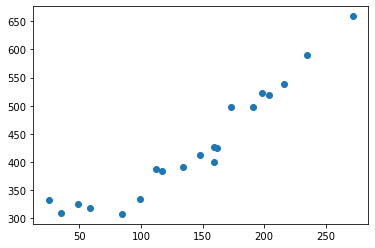

In [4]:
# プロット
plt.plot(train_x, train_y, 'o')
plt.show()

In [5]:
# 標準化　Z-scoreとは、偏差をみてスケールを一致させる（　身長 と 体重とで単位が違うので偏差を使い同じにする
mu = train_x.mean()   # 平均
sigma = train_x.std() # 標準偏差
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

In [6]:
# パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

In [7]:
# 予測関数
def f(x):
    return theta0 + theta1 * x

In [8]:
# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

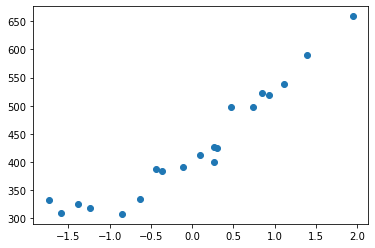

In [9]:
# プロット
plt.plot(train_z, train_y, 'o')
plt.show()

In [10]:
# 学習率 大きい数字は 1e3 のように e を使って表すことがあります。e は 10 のべき乗を表します。例えば、1e3 は 103=1000 を表します。
ETA = 1e-3
# 誤差の差分
diff = 1
# 更新回数
count = 0

In [11]:
# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    # パラメータを更新
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    # 前回の誤差との差分を計算
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1回目: theta0 = 9.102, theta1 = 2.239, 差分 = 76183.9692
2回目: theta0 = 17.503, theta1 = 4.064, 差分 = 73167.0840
3回目: theta0 = 25.736, theta1 = 5.852, 差分 = 70269.6675
4回目: theta0 = 33.804, theta1 = 7.605, 差分 = 67486.9886
5回目: theta0 = 41.711, theta1 = 9.322, 差分 = 64814.5039
6回目: theta0 = 49.460, theta1 = 11.005, 差分 = 62247.8495
7回目: theta0 = 57.053, theta1 = 12.655, 差分 = 59782.8347
8回目: theta0 = 64.495, theta1 = 14.271, 差分 = 57415.4344
9回目: theta0 = 71.788, theta1 = 15.855, 差分 = 55141.7832
10回目: theta0 = 78.936, theta1 = 17.408, 差分 = 52958.1686
11回目: theta0 = 85.940, theta1 = 18.929, 差分 = 50861.0251
12回目: theta0 = 92.804, theta1 = 20.420, 差分 = 48846.9285
13回目: theta0 = 99.531, theta1 = 21.881, 差分 = 46912.5902
14回目: theta0 = 106.123, theta1 = 23.313, 差分 = 45054.8516
15回目: theta0 = 112.584, theta1 = 24.717, 差分 = 43270.6795
16回目: theta0 = 118.915, theta1 = 26.092, 差分 = 41557.1606
17回目: theta0 = 125.120, theta1 = 27.440, 差分 = 39911.4970
18回目: theta0 = 131.201, theta1 = 28.760, 差分 = 38331.0017
19

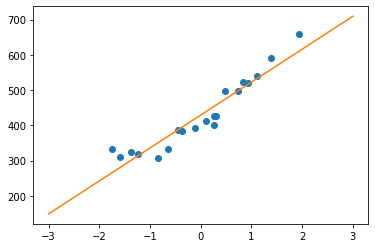

In [12]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

In [13]:
f(standardize(100))

370.9672926774498

In [14]:
f(standardize(200))

510.4697760331694

In [15]:
f(standardize(150))

440.7185343553096